In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

**Opening the training and test sets to `.pkl` file**

In [2]:
with open('./data/base.pkl', 'rb') as f:
	x_train, x_test, y_train, y_test = pickle.load(f)

**Setting up the hyperparameters for model tuning**

In [3]:
search_space = {
	'criterion':  ['gini', 'entropy'],
	'max_depth':  [None, 2, 4, 6, 8],
	'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

model = BayesSearchCV(
	estimator=DecisionTreeClassifier(),
	search_spaces=search_space,
	cv=10,
	n_jobs=5,
	verbose=0,
	n_iter=30,
)

model.fit(x_train, y_train)

print(f'Best parameters: {model.best_params_}')
print(f'Best score: {model.best_score_}')

Best parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 4), ('max_features', None)])
Best score: 0.8188380281690142


**Running the model with the best hyperparameters**

Train score: 0.8356741573033708


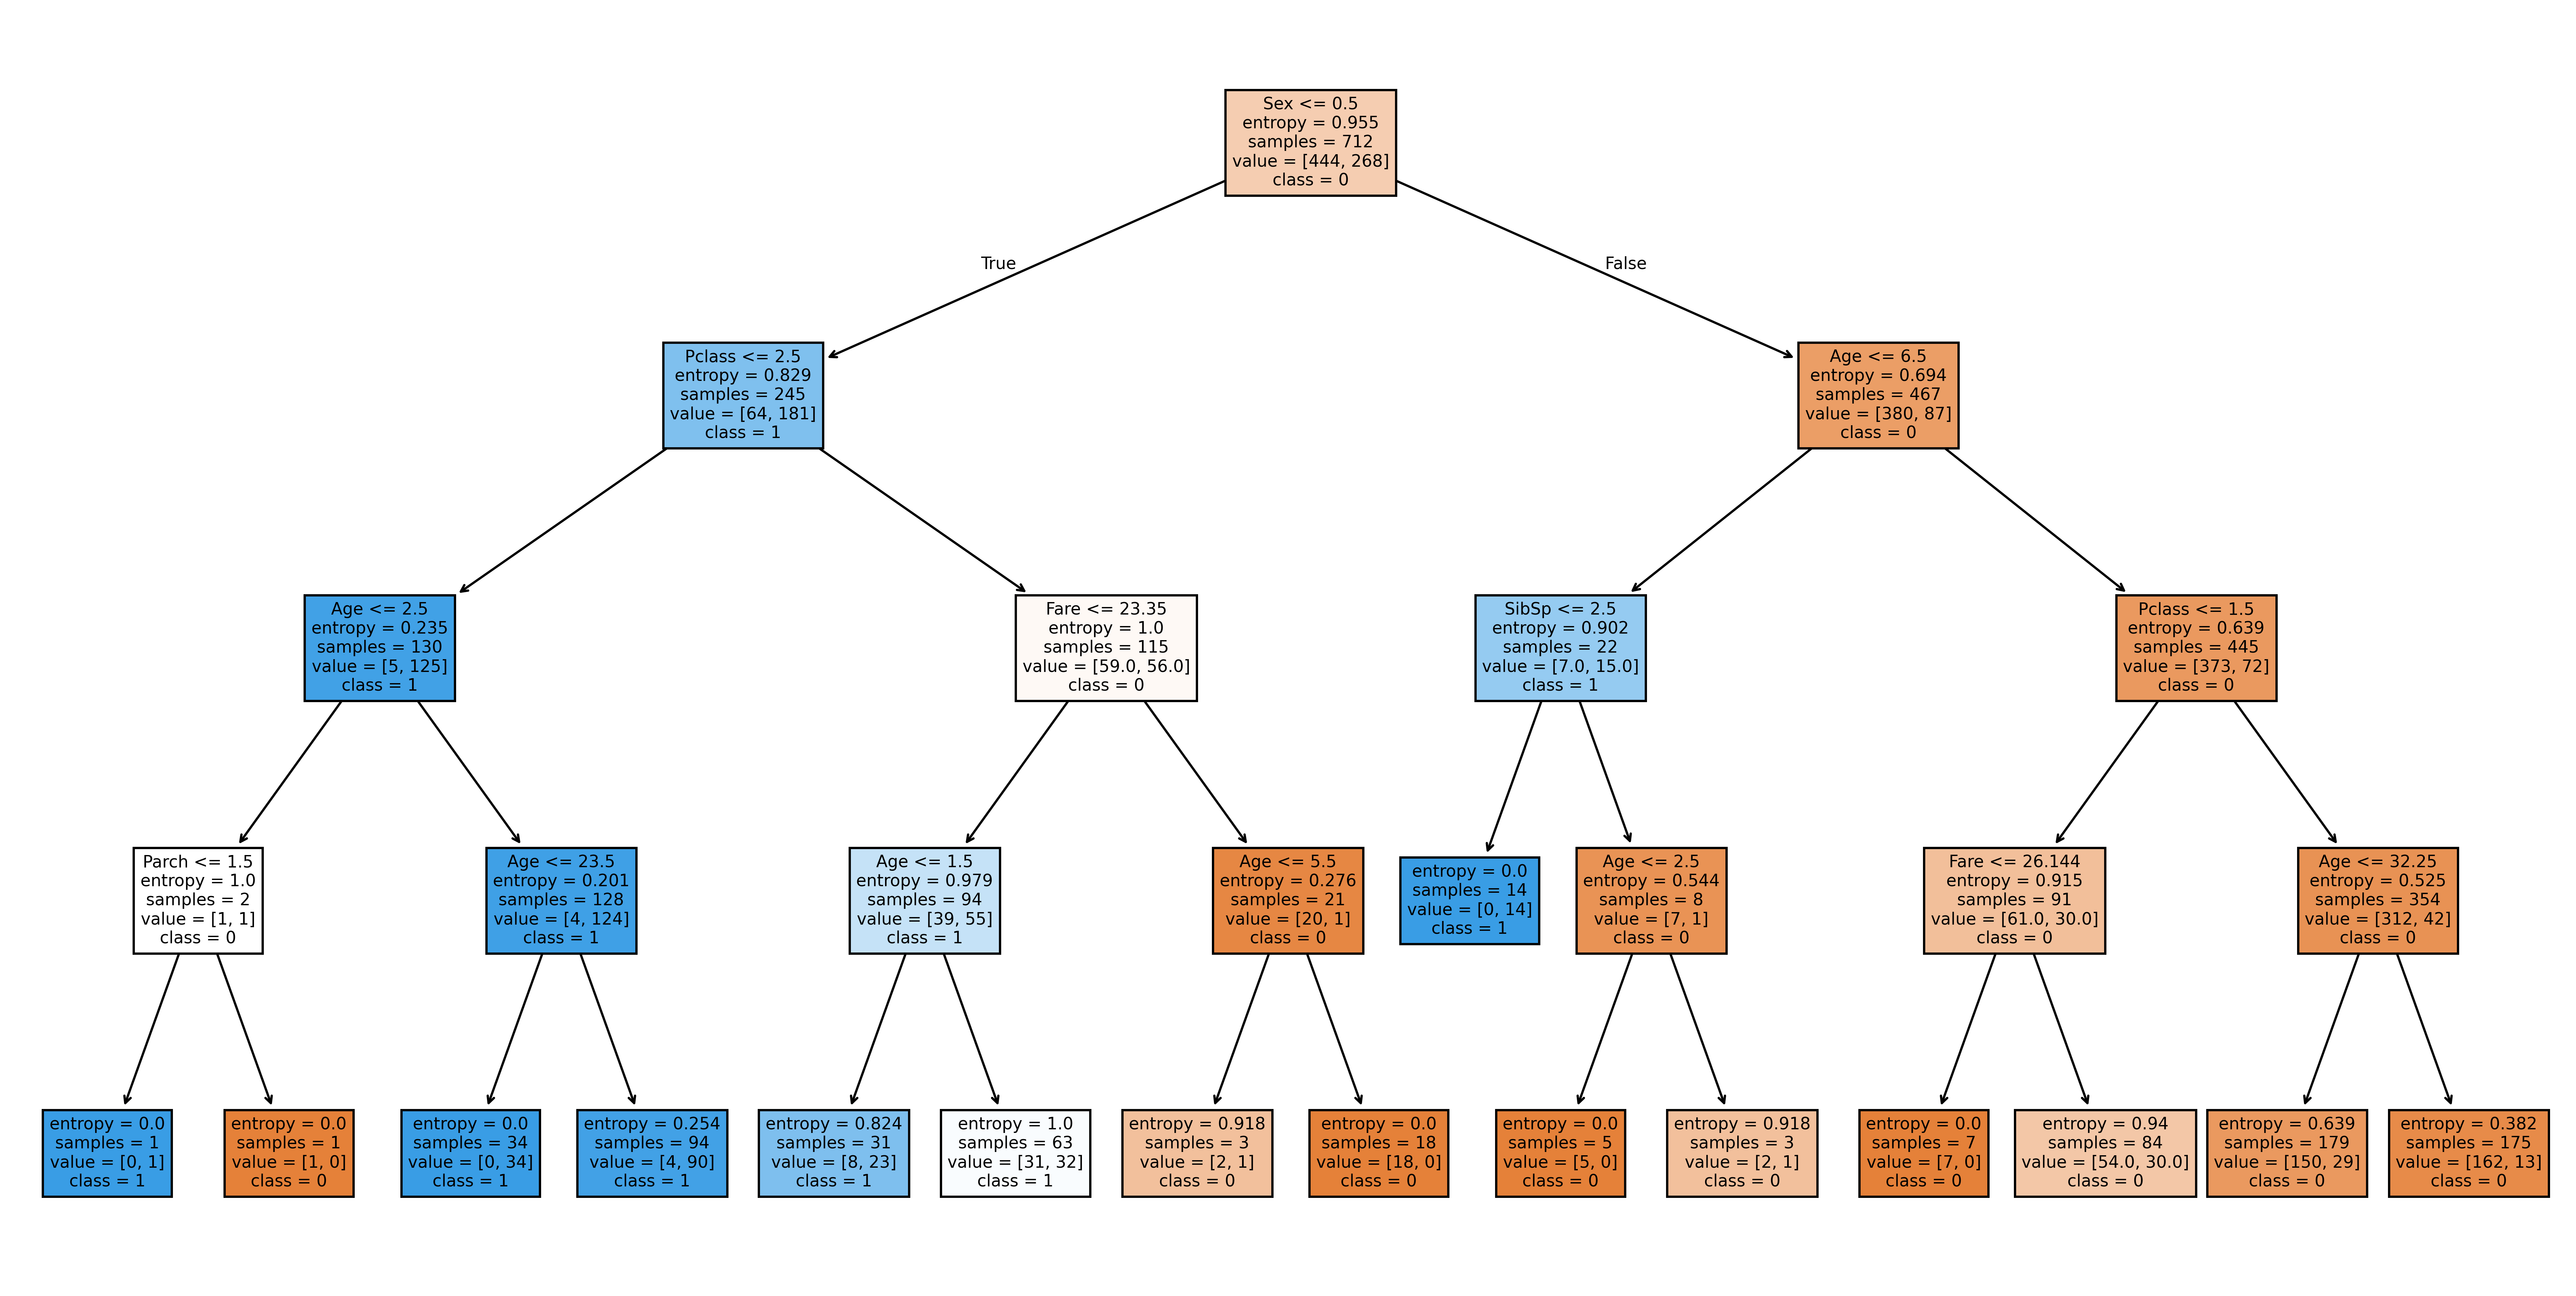

In [4]:
model = model.best_estimator_
model.fit(x_train, y_train)

print(f'Train score: {model.score(x_train, y_train)}')
plt.figure(figsize=(20, 10), dpi=500)
tree.plot_tree(model, feature_names=x_test.columns, class_names=['0', '1'], filled=True)
plt.show()

**Testing the model on the test set**

Precision: 79.69%
Recall: 68.92%
F1: 73.91%


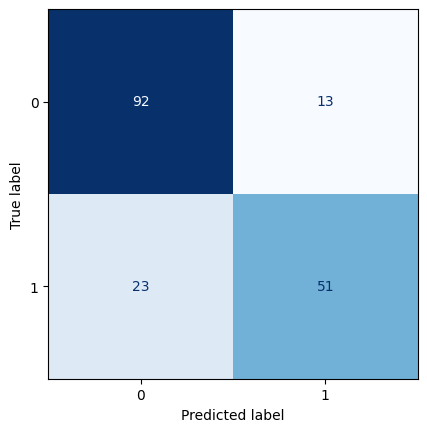

In [5]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)

print(f'Precision: {precision_score(y_test, predictions) * 100:.2f}%')
print(f'Recall: {recall_score(y_test, predictions) * 100:.2f}%')
print(f'F1: {f1_score(y_test, predictions) * 100:.2f}%')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(colorbar=False, cmap='Blues')
plt.grid(False)